In [5]:
import numpy as np
import pandas as pd
import psycopg2
import scipy as sp
from scipy import stats as st
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn as sk
from sklearn.model_selection import train_test_split
import seaborn as sns
color = sns.color_palette()
from datetime import date, timedelta
from sklearn import preprocessing as skp
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sys
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import networkx as nx

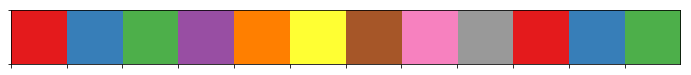

In [5]:
color = sns.color_palette()
color = sns.color_palette("Set1", 12)
sns.palplot(color)
plt.show()

In [6]:
active_master = pd.read_csv('active_master.csv')
all_master = pd.read_csv('active_master_all.csv')

In [7]:
player_weapons = pd.read_csv('player_weapons.csv')
csgo_profiles = pd.read_csv('profiles.csv')

In [8]:
list(player_weapons)

['user_id',
 'ak47',
 'aug',
 'awp',
 'bizon',
 'deagle',
 'elite',
 'famas',
 'fiveseven',
 'g3sg1',
 'galilar',
 'glock',
 'hegrenade',
 'hkp2000',
 'knife',
 'm249',
 'm4a1',
 'mac10',
 'mag7',
 'molotov',
 'mp7',
 'mp9',
 'negev',
 'nova',
 'p250',
 'p90',
 'sawedoff',
 'scar20',
 'sg556',
 'ssg08',
 'taser',
 'tec9',
 'ump45',
 'xm1014']

In [9]:
active_master.shape

(56733, 52)

In [10]:
all_master.head(5)

,Unnamed: 0,index,user_id,rank_id,goal_id,played_freq,servers_ratio,country_ratio,lang_ratio,ak47,...,deaths/round,mvps/win,wins/round,headshot/kills,shothit/shotfire,kill/death,time/round,headshot/round,shothit/round,rank_group
0,0,0,4113,16,2,0.420455,0.052156,0.094118,0.073009,0.154231,...,1.229128,0.254175,0.492310,0.458321,0.169025,0.986079,72.553262,0.555493,3.927929,3.0
1,1,1,89467,1,2,0.011364,0.235643,0.065323,0.048030,0.140938,...,1.596905,0.162255,0.440893,0.299914,0.146797,0.556156,89.881025,0.266362,3.314815,1.0
2,2,2,1212,11,2,0.420455,0.052156,0.094118,0.073009,0.163599,...,1.955185,0.280108,0.510524,0.312245,0.178860,0.995084,108.917549,0.607495,6.049641,2.0
3,3,3,10137,14,3,0.181818,0.293175,0.017124,0.392501,0.233109,...,1.343698,0.296301,0.509453,0.470809,0.246623,1.283837,88.076040,0.812188,5.430678,3.0
4,4,4,1259,17,3,0.340909,0.052156,0.094118,0.073009,0.195589,...,1.320352,0.258399,0.514821,0.482344,0.200278,1.179165,80.186970,0.750968,4.684640,3.0


In [11]:
player_weapons.head(5)

,user_id,ak47,aug,awp,bizon,deagle,elite,famas,fiveseven,g3sg1,...,p250,p90,sawedoff,scar20,sg556,ssg08,taser,tec9,ump45,xm1014
0,2,0.180392,0.000000,0.400982,0.000000,0.264582,0.0,0.000000,0.0,0.0,...,0.242368,0.170475,0.0,0.222684,0.0,0.000000,0.0,0.197381,0.000000,0.00000
1,4,0.163336,0.000000,0.380000,0.202312,0.232558,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000
2,6,0.214414,0.000000,0.399562,0.000000,0.290274,0.0,0.000000,0.0,0.0,...,0.000000,0.198407,0.0,0.000000,0.0,0.319872,0.0,0.000000,0.201223,0.00000
3,105,0.113132,0.193820,0.304348,0.000000,0.253968,0.0,0.162291,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.16051
4,122,0.194708,0.198773,0.450000,0.000000,0.230769,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.202153,0.00000


In [12]:
csgo_profiles = csgo_profiles[['user_id','rank_id']]
csgo_profiles.head(5)

,user_id,rank_id
0,1,1
1,5,1
2,3,10
3,206,10
4,382,10


In [13]:
player_weapons = pd.merge(player_weapons, csgo_profiles, how='left', left_on="user_id", right_on='user_id', copy=True)
player_weapons.head(5)

,user_id,ak47,aug,awp,bizon,deagle,elite,famas,fiveseven,g3sg1,...,p90,sawedoff,scar20,sg556,ssg08,taser,tec9,ump45,xm1014,rank_id
0,2,0.180392,0.000000,0.400982,0.000000,0.264582,0.0,0.000000,0.0,0.0,...,0.170475,0.0,0.222684,0.0,0.000000,0.0,0.197381,0.000000,0.00000,17
1,4,0.163336,0.000000,0.380000,0.202312,0.232558,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,18
2,6,0.214414,0.000000,0.399562,0.000000,0.290274,0.0,0.000000,0.0,0.0,...,0.198407,0.0,0.000000,0.0,0.319872,0.0,0.000000,0.201223,0.00000,16
3,105,0.113132,0.193820,0.304348,0.000000,0.253968,0.0,0.162291,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.16051,1
4,122,0.194708,0.198773,0.450000,0.000000,0.230769,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.202153,0.00000,3


In [14]:
list(player_weapons)

['user_id',
 'ak47',
 'aug',
 'awp',
 'bizon',
 'deagle',
 'elite',
 'famas',
 'fiveseven',
 'g3sg1',
 'galilar',
 'glock',
 'hegrenade',
 'hkp2000',
 'knife',
 'm249',
 'm4a1',
 'mac10',
 'mag7',
 'molotov',
 'mp7',
 'mp9',
 'negev',
 'nova',
 'p250',
 'p90',
 'sawedoff',
 'scar20',
 'sg556',
 'ssg08',
 'taser',
 'tec9',
 'ump45',
 'xm1014',
 'rank_id']

In [15]:
player_weapons.head(5)

,user_id,ak47,aug,awp,bizon,deagle,elite,famas,fiveseven,g3sg1,...,p90,sawedoff,scar20,sg556,ssg08,taser,tec9,ump45,xm1014,rank_id
0,2,0.180392,0.000000,0.400982,0.000000,0.264582,0.0,0.000000,0.0,0.0,...,0.170475,0.0,0.222684,0.0,0.000000,0.0,0.197381,0.000000,0.00000,17
1,4,0.163336,0.000000,0.380000,0.202312,0.232558,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,18
2,6,0.214414,0.000000,0.399562,0.000000,0.290274,0.0,0.000000,0.0,0.0,...,0.198407,0.0,0.000000,0.0,0.319872,0.0,0.000000,0.201223,0.00000,16
3,105,0.113132,0.193820,0.304348,0.000000,0.253968,0.0,0.162291,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.16051,1
4,122,0.194708,0.198773,0.450000,0.000000,0.230769,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.202153,0.00000,3


In [16]:
active_master = active_master.drop(active_master.columns[[0,4,51]],1)
active_master.head(5)

,user_id,rank_id,goal_id,servers_ratio,country_ratio,lang_ratio,ak47,aug,awp,bizon,...,kills/round,deaths/round,mvps/win,wins/round,headshot/kills,shothit/shotfire,kill/death,time/round,headshot/round,shothit/round
0,4113,16,2,0.052156,0.094118,0.073009,0.154231,0.0,0.265342,0.0,...,1.212017,1.229128,0.254175,0.492310,0.458321,0.169025,0.986079,72.553262,0.555493,3.927929
1,1212,11,2,0.052156,0.094118,0.073009,0.163599,0.0,0.293858,0.0,...,1.945573,1.955185,0.280108,0.510524,0.312245,0.178860,0.995084,108.917549,0.607495,6.049641
2,10137,14,3,0.293175,0.017124,0.392501,0.233109,0.0,0.394342,0.0,...,1.725089,1.343698,0.296301,0.509453,0.470809,0.246623,1.283837,88.076040,0.812188,5.430678
3,1259,17,3,0.052156,0.094118,0.073009,0.195589,0.0,0.368517,0.0,...,1.556914,1.320352,0.258399,0.514821,0.482344,0.200278,1.179165,80.186970,0.750968,4.684640
4,93811,11,3,0.734524,0.021788,0.028710,0.202647,0.0,0.305131,0.0,...,0.996629,0.875628,0.309977,0.509527,0.448647,0.209883,1.138188,65.797001,0.447135,3.085506


In [17]:
player_weapons.set_index("user_id", inplace = True)
player_weapons.head(5)

,ak47,aug,awp,bizon,deagle,elite,famas,fiveseven,g3sg1,galilar,...,p90,sawedoff,scar20,sg556,ssg08,taser,tec9,ump45,xm1014,rank_id
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.180392,0.000000,0.400982,0.000000,0.264582,0.0,0.000000,0.0,0.0,0.000000,...,0.170475,0.0,0.222684,0.0,0.000000,0.0,0.197381,0.000000,0.00000,17
4,0.163336,0.000000,0.380000,0.202312,0.232558,0.0,0.000000,0.0,0.0,0.175105,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,18
6,0.214414,0.000000,0.399562,0.000000,0.290274,0.0,0.000000,0.0,0.0,0.000000,...,0.198407,0.0,0.000000,0.0,0.319872,0.0,0.000000,0.201223,0.00000,16
105,0.113132,0.193820,0.304348,0.000000,0.253968,0.0,0.162291,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.16051,1
122,0.194708,0.198773,0.450000,0.000000,0.230769,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.202153,0.00000,3


In [18]:
active_master.set_index("user_id", inplace = True)
active_master.head(5)

,rank_id,goal_id,servers_ratio,country_ratio,lang_ratio,ak47,aug,awp,bizon,deagle,...,kills/round,deaths/round,mvps/win,wins/round,headshot/kills,shothit/shotfire,kill/death,time/round,headshot/round,shothit/round
user_id,,,,,,,,,,,,,,,,,,,,,
4113,16,2,0.052156,0.094118,0.073009,0.154231,0.0,0.265342,0.0,0.214793,...,1.212017,1.229128,0.254175,0.492310,0.458321,0.169025,0.986079,72.553262,0.555493,3.927929
1212,11,2,0.052156,0.094118,0.073009,0.163599,0.0,0.293858,0.0,0.211788,...,1.945573,1.955185,0.280108,0.510524,0.312245,0.178860,0.995084,108.917549,0.607495,6.049641
10137,14,3,0.293175,0.017124,0.392501,0.233109,0.0,0.394342,0.0,0.292595,...,1.725089,1.343698,0.296301,0.509453,0.470809,0.246623,1.283837,88.076040,0.812188,5.430678
1259,17,3,0.052156,0.094118,0.073009,0.195589,0.0,0.368517,0.0,0.244317,...,1.556914,1.320352,0.258399,0.514821,0.482344,0.200278,1.179165,80.186970,0.750968,4.684640
93811,11,3,0.734524,0.021788,0.028710,0.202647,0.0,0.305131,0.0,0.276085,...,0.996629,0.875628,0.309977,0.509527,0.448647,0.209883,1.138188,65.797001,0.447135,3.085506


In [19]:
list(all_master)

['Unnamed: 0',
 'index',
 'user_id',
 'rank_id',
 'goal_id',
 'played_freq',
 'servers_ratio',
 'country_ratio',
 'lang_ratio',
 'ak47',
 'aug',
 'awp',
 'bizon',
 'deagle',
 'elite',
 'famas',
 'fiveseven',
 'g3sg1',
 'galilar',
 'glock',
 'hegrenade',
 'hkp2000',
 'knife',
 'm249',
 'm4a1',
 'mac10',
 'mag7',
 'molotov',
 'mp7',
 'mp9',
 'negev',
 'nova',
 'p250',
 'p90',
 'sawedoff',
 'scar20',
 'sg556',
 'ssg08',
 'taser',
 'tec9',
 'ump45',
 'xm1014',
 'kills/round',
 'deaths/round',
 'mvps/win',
 'wins/round',
 'headshot/kills',
 'shothit/shotfire',
 'kill/death',
 'time/round',
 'headshot/round',
 'shothit/round',
 'rank_group']

In [20]:
#col = all_master.drop(['rank_id','user_id'], axis=1)
col = all_master[[#'rank_id',
 'kills/round',
 'deaths/round',
 'mvps/win',
 'wins/round',
 'headshot/kills',
 'shothit/shotfire',
 'kill/death',
 'time/round',
 'headshot/round',
 'shothit/round']]
#col = col.columns
col.shape

(74375, 10)

In [21]:
col = m12[[
 'total_kills',
 'total_deaths',
 'total_time_played',
 'total_kills_headshot',
 'total_shots_hit',
 'total_mvps',
 'total_wins',
 'total_rounds_played',
 'total_shots_fired']]

NameError: name 'm12' is not defined

In [22]:
a = csgo_profiles['rank_id']
for i in col:
    b = active_master[i]
    #info = sk.metrics.mutual_info_score(a,b)
    tau = st.kendalltau(a,b)
    rho = st.spearmanr(a,b)
    #info = st.entropy(a,b)
    #if info > 0:
    #    print(i, info)
    print (i, rho)
    print (i, tau)

ValueError: All inputs to `kendalltau` must be of the same size, found x-size 84393 and y-size 56733

In [667]:
a = active_master['rank_id']
for i in col:
    b = active_master[i]
    info = sk.metrics.mutual_info_score(a,b)
    #tau = st.kendalltau(a,b)
    #info = st.entropy(a,b)
    if info > 0:
        print(i, info)
type (info)

rank_id 2.74188149727
servers_ratio 0.108729669946
lang_ratio 0.139331525973


numpy.float64

## Network Graph

In [117]:
# Weapons Network
X_train = all_master[['rank_id',
 'ak47',
 'aug',
 'awp',
 'bizon',
 'deagle',
 'famas',
 'glock',
 'm249',
 'sg556',
 'ump45',
 'm4a1',
 'p250']]
network = X_train
network.head(5)

#'scar20'
#'awp'

,rank_id,ak47,aug,awp,bizon,deagle,famas,glock,m249,sg556,ump45,m4a1,p250
0,16,0.154231,0.0,0.265342,0.0,0.214793,0.000000,0.171754,0.0,0.144003,0.178957,0.175267,0.0
1,1,0.140938,0.0,0.230093,0.0,0.187248,0.000000,0.152818,0.0,0.000000,0.148126,0.166503,0.0
2,11,0.163599,0.0,0.293858,0.0,0.211788,0.000000,0.178764,0.0,0.000000,0.000000,0.190340,0.0
3,14,0.233109,0.0,0.394342,0.0,0.292595,0.242596,0.225332,0.0,0.000000,0.241587,0.267558,0.0
4,17,0.195589,0.0,0.368517,0.0,0.244317,0.000000,0.178745,0.0,0.000000,0.171425,0.203593,0.0


In [126]:
#network1=network1.drop(['index'], axis =1)
#network1=network1.T
network1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,16.0,0.154231,0.000000,0.265342,0.0,0.214793,0.000000,0.171754,0.0,0.144003,0.178957,0.175267,0.000000
1,1.0,0.140938,0.000000,0.230093,0.0,0.187248,0.000000,0.152818,0.0,0.000000,0.148126,0.166503,0.000000
2,11.0,0.163599,0.000000,0.293858,0.0,0.211788,0.000000,0.178764,0.0,0.000000,0.000000,0.190340,0.000000
3,14.0,0.233109,0.000000,0.394342,0.0,0.292595,0.242596,0.225332,0.0,0.000000,0.241587,0.267558,0.000000
4,17.0,0.195589,0.000000,0.368517,0.0,0.244317,0.000000,0.178745,0.0,0.000000,0.171425,0.203593,0.000000
5,11.0,0.202647,0.000000,0.305131,0.0,0.276085,0.000000,0.212437,0.0,0.000000,0.000000,0.217662,0.000000
6,1.0,0.152441,0.000000,0.373447,0.0,0.235543,0.000000,0.000000,0.0,0.000000,0.181694,0.173920,0.000000
7,15.0,0.136099,0.000000,0.323910,0.0,0.197485,0.192447,0.158665,0.0,0.000000,0.000000,0.152628,0.000000
8,3.0,0.121665,0.000000,0.228637,0.0,0.147102,0.000000,0.146508,0.0,0.000000,0.161117,0.176681,0.000000
9,18.0,0.109162,0.000000,0.412698,0.0,0.146667,0.139985,0.000000,0.0,0.000000,0.139834,0.166639,0.000000


In [127]:
N = len(network1)
for i in range(0,N):
    network=np.sort(network1.iloc[i,:])   

In [128]:
network1=network

In [111]:
#network = network.corr(method='kendall')
network = network.corr(method='pearson')
#network = network[network != 1]
network

,rank_id,ak47,aug,awp,bizon,deagle,famas,glock,m249,sg556,ump45,m4a1,p250
rank_id,1.000000,0.199267,-0.157185,0.068425,-0.124072,0.074563,0.228983,-0.093703,-0.003517,-0.194046,0.162912,0.139300,0.112524
ak47,0.199267,1.000000,-0.006653,0.394793,-0.011271,0.290652,0.095456,0.101925,0.030209,-0.022184,0.167042,0.590978,0.110679
aug,-0.157185,-0.006653,1.000000,0.053301,0.072587,0.027409,-0.138374,0.037559,0.031012,-0.037619,-0.032394,0.008069,-0.021515
awp,0.068425,0.394793,0.053301,1.000000,0.023657,0.178581,0.147575,0.142173,0.017583,0.063837,0.077749,0.315377,0.100010
bizon,-0.124072,-0.011271,0.072587,0.023657,1.000000,-0.016428,-0.020841,0.023825,0.002097,0.057236,-0.147018,0.005620,-0.002525
deagle,0.074563,0.290652,0.027409,0.178581,-0.016428,1.000000,-0.050333,-0.048046,0.019943,-0.010405,0.058913,0.231705,-0.123990
famas,0.228983,0.095456,-0.138374,0.147575,-0.020841,-0.050333,1.000000,0.030052,-0.000526,-0.172507,0.101155,0.068509,0.088051
glock,-0.093703,0.101925,0.037559,0.142173,0.023825,-0.048046,0.030052,1.000000,0.006957,0.044669,0.032465,0.079306,-0.506475
m249,-0.003517,0.030209,0.031012,0.017583,0.002097,0.019943,-0.000526,0.006957,1.000000,-0.005515,-0.054271,0.035649,0.009686
sg556,-0.194046,-0.022184,-0.037619,0.063837,0.057236,-0.010405,-0.172507,0.044669,-0.005515,1.000000,-0.043546,0.003138,-0.038857


In [129]:
#network = network.corr(method='kendall')
network = network.corr(method='spearman')
#network = network[network != 1]
network

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [293]:
#network2 = network2.T
#network2= network2.reset_index()
network3 = network2.drop(columns =['index'])
network3

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0.189842,-0.195554,0.100595,-0.129694,0.12892,0.259057,-0.122493,-0.0216007,-0.212374,0.161876,0.140626,0.119596
1,0.189842,1,-0.0364517,0.636729,-0.0416541,0.578574,0.106762,0.246423,0.00325598,-0.0170783,0.300818,0.836662,0.107494
2,-0.195554,-0.0364517,1,0.052058,0.0599182,0.00143567,-0.169875,0.0486388,0.0274691,-0.0431696,-0.0486399,-0.00295982,-0.0392918
3,0.100595,0.636729,0.052058,1,0.0119852,0.51154,0.0646373,0.217857,0.0185645,0.074677,0.202227,0.630201,0.0945388
4,-0.129694,-0.0416541,0.0599182,0.0119852,1,-0.0318937,-0.0322705,0.0274095,-0.00682128,0.069817,-0.154643,-0.0205246,-0.0142564
5,0.12892,0.578574,0.00143567,0.51154,-0.0318937,1,-0.014083,0.116211,0.0136447,-0.013253,0.182431,0.55087,-0.0297515
6,0.259057,0.106762,-0.169875,0.0646373,-0.0322705,-0.014083,1,0.0010176,-0.00908748,-0.199769,0.118652,0.0939322,0.0861909
7,-0.122493,0.246423,0.0486388,0.217857,0.0274095,0.116211,0.0010176,1,0.0118585,0.0611005,0.0912549,0.237775,-0.455079
8,-0.0216007,0.00325598,0.0274691,0.0185645,-0.00682128,0.0136447,-0.00908748,0.0118585,1,0.00368777,-0.0622726,0.0152701,-0.00111201
9,-0.212374,-0.0170783,-0.0431696,0.074677,0.069817,-0.013253,-0.199769,0.0611005,0.00368777,1,-0.0462572,0.0222675,-0.0460813


In [230]:
network = network[abs(network) >= 0.1]
network

/Users/jennyyang/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6515: RuntimeWarning: invalid value encountered in absolute
  return np.abs(self)


,rank_id,ak47,aug,awp,bizon,deagle,famas,glock,m249,sg556,ump45,m4a1,p250
rank_id,NaN,0.189842,-0.195554,0.100595,-0.129694,0.128920,0.259057,-0.122493,NaN,-0.212374,0.161876,0.140626,0.119596
ak47,0.189842,NaN,NaN,0.636729,NaN,0.578574,0.106762,0.246423,NaN,NaN,0.300818,0.836662,0.107494
aug,-0.195554,NaN,NaN,NaN,NaN,NaN,-0.169875,NaN,NaN,NaN,NaN,NaN,NaN
awp,0.100595,0.636729,NaN,NaN,NaN,0.511540,NaN,0.217857,NaN,NaN,0.202227,0.630201,NaN
bizon,-0.129694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.154643,NaN,NaN
deagle,0.128920,0.578574,NaN,0.511540,NaN,NaN,NaN,0.116211,NaN,NaN,0.182431,0.550870,NaN
famas,0.259057,0.106762,-0.169875,NaN,NaN,NaN,NaN,NaN,NaN,-0.199769,0.118652,NaN,NaN
glock,-0.122493,0.246423,NaN,0.217857,NaN,0.116211,NaN,NaN,NaN,NaN,NaN,0.237775,-0.455079
m249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sg556,-0.212374,NaN,NaN,NaN,NaN,NaN,-0.199769,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
thr=0.1
N=13

In [295]:
for i in range(N):
    for j in range(N):
        if network3[i][j] == 1 or network3[i][j] <= thr:
            network3[i][j] = 0
        elif network3[i][j] > thr:
            network3[i][j] = 1
            
network3

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,1,0,1,1,0,0,0,1,1,1
1,1,0,0,1,0,1,1,1,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,1,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,1,0,0,0,1,0,0,1,1,0
6,1,1,0,0,0,0,0,0,0,0,1,0,0
7,0,1,0,1,0,1,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0


In [296]:
net= network3.sum()
net

0     7.0
1     8.0
2     0.0
3     6.0
4     0.0
5     6.0
6     3.0
7     4.0
8     0.0
9     0.0
10    6.0
11    7.0
12    3.0
dtype: float64

In [299]:
net_coeff = np.diagonal(np.dot(np.dot(network3,network3),network3))/2;
net_coeff 

array([14.0, 17.0, 0.0, 13.0, 0.0, 13.0, 3.0, 6.0, 0.0, 0.0, 12.0, 15.0,
       3.0], dtype=object)

In [303]:
net_coeff = np.float64((2*net_coeff))/((net)*(net-1))
net_coeff

0     0.666667
1     0.607143
2          NaN
3     0.866667
4          NaN
5     0.866667
6     1.000000
7     1.000000
8          NaN
9          NaN
10    0.800000
11    0.714286
12    1.000000
dtype: float64

In [328]:
C = np.matrix([[0,1,	0,	1,	0	,1,	1	,0,	0	,0,	1,	1	,1],[1	,0	,0,	1	,0,	1,	1,	1	,0,	0,	1,	1,	1],
              [0,	0	,0	,0,	0,	0	,0,	0	,0,	0,	0,	0,	0],[1	,1,	0,	0,	0	,1,	0	,1,	0,	0	,1,	1,	0],
              [0	,0,	0	,0,	0,	0	,0,	0,	0	,0	,0,	0,	0],[1	,1	,0,	1,	0,	0,	0,	1,	0	,0	,1,	1,	0],
              [1	,1,	0	,0,	0,	0	,0,	0,	0,	0,	1,	0,	0],[0	,1	,0	,1,	0,	1	,0,	0,	0,	0,	0,	1,	0],
              [0,	0,	0,	0,	0	,0,	0,	0,	0,	0,	0,	0,	0],[0	,0	,0,	0,	0,	0,	0	,0,	0,	0,	0,	0,	0],
              [1	,1	,0,	1,	0,	1,	1,	0,	0	,0,	0,	1,	0],[1,	1,	0,	1,	0	,1	,0,	1,	0	,0,	1,0	,1],
              [1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0]])
C

matrix([[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [329]:
value_c, vector_c = np.linalg.eig(C) # eigenvalues, eigenvectors = np.linalg.eig(array)
#D_c = np.linalg.inv(vector_c).dot(C).dot(vector_c) #M^(-1).A.M


In [330]:
z_c = np.argmax(value_c) # find eigenvectors which corresponds to the largest eigenvalue 
centrality_C = np.abs(vector_c[z_c]) 
centrality_C

matrix([[  3.80983320e-01,   3.34796737e-01,   9.66432099e-02,
           2.72382698e-01,   4.87624698e-01,   3.68427033e-01,
           5.34522484e-01,   1.32846992e-16,   1.67253158e-01,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00]])

In [128]:
weap_sum = abs(network).sum() 
weap_sum = weap_sum[weap_sum>0]
weap_sum

rank_id      1.761578
ak47         3.922114
aug          0.627359
awp          3.026360
bizon        0.289293
deagle       3.094063
famas        1.548289
fiveseven    0.354009
g3sg1        0.106739
galilar      0.516854
glock        2.340472
hkp2000      2.971086
m4a1         3.690605
mac10        0.155351
mp7          0.239524
mp9          0.104838
negev        0.168866
p250         1.025381
p90          1.661081
scar20       0.272947
sg556        0.812459
ssg08        1.802486
tec9         0.557325
ump45        2.099758
dtype: float64

In [231]:
A = network.columns
B = network.index
A_n = []
B_n = []
W_n = []
colors = []

for i in range(len(A)):
    for j in range(i+1):
        weight = network[A[i]][B[j]]
        if np.isnan(weight):
            pass
        else:
            A_n.append(A[i])
            B_n.append(B[j])
            W_n.append(weight)
            
            if weight > 0:
                colors.append(color[2])
            else:
                colors.append(color[0])

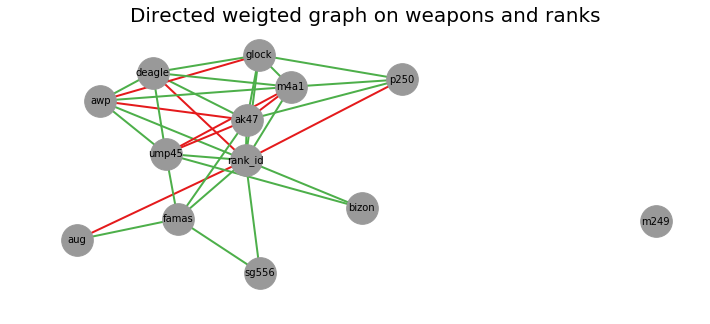

In [232]:
# Undirected Graph
plt.figure(figsize=(12,5))
plt.title("Directed weigted graph on weapons and ranks", fontsize = 20)
G=nx.Graph()
G.add_nodes_from(A)
for i in range(len(A_n)):
    p = (A_n[i],B_n[i])
    length = np.sqrt(2*(1-W_n[i]))
    weigth = W_n[i]
    G.add_edge(*p, weight = length, length = length)
        
#nx.draw(G, with_labels=True, node_color = [color[0]], node_size = 1000)
nx.draw(G, with_labels=True, node_color = [color[8]], edge_color = colors, node_size = 1000, font_size=10, width=2)


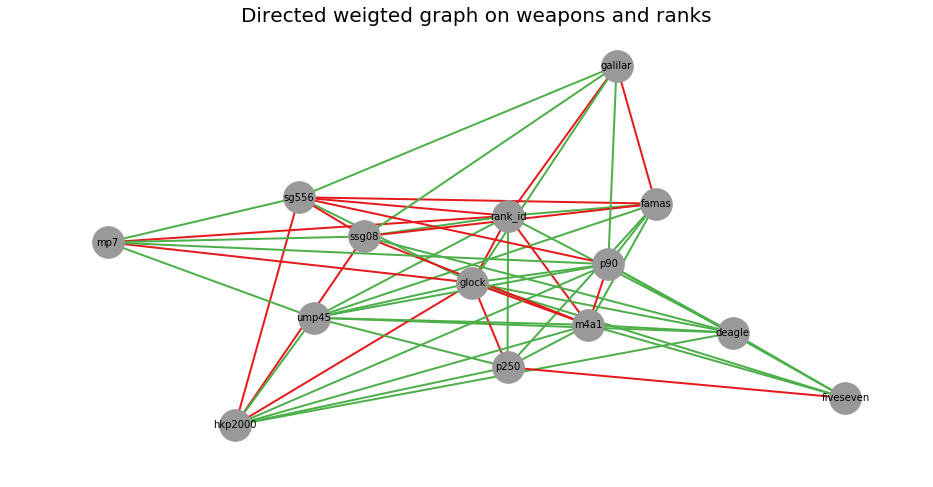

In [119]:
# Undirected Graph
plt.figure(figsize=(16,8))
plt.title("Directed weigted graph on weapons and ranks", fontsize = 20)
G=nx.Graph()
G.add_nodes_from(A)
for i in range(len(A_n)):
    p = (A_n[i],B_n[i])
    length = np.sqrt(2*(1-W_n[i]))
    weigth = W_n[i]
    G.add_edge(*p, weight = length, length = length)
        
#nx.draw(G, with_labels=True, node_color = [color[0]], node_size = 1000)
nx.draw(G, with_labels=True, node_color = [color[8]], edge_color = colors, node_size = 1000, font_size=10, width=2)


In [88]:
X_train = all_master[[ 'rank_id',
 'goal_id',
 'servers_ratio',
 'country_ratio',
 'lang_ratio',
 'mvps/win',
 'wins/round',
 'headshot/kills',
 'shothit/shotfire',
 'kill/death',
 'headshot/round']]
    
network = X_train

# 'deaths/round',
# 'kills/round'
# 'shothit/round'
# 'time/round',
# 'played_freq',

In [89]:
network = network.corr(method='spearman')
#network = network[network != 1]
network

,rank_id,goal_id,servers_ratio,country_ratio,lang_ratio,mvps/win,wins/round,headshot/kills,shothit/shotfire,kill/death,headshot/round
rank_id,1.000000,0.236591,0.231978,0.096984,0.222068,0.178023,0.304468,0.509034,0.162586,0.291805,0.401597
goal_id,0.236591,1.000000,0.102378,0.066804,0.103711,0.068526,0.031190,0.144355,0.012527,0.033266,0.086572
servers_ratio,0.231978,0.102378,1.000000,0.011547,0.235588,0.155345,0.065641,0.154305,0.019627,0.063522,0.086131
country_ratio,0.096984,0.066804,0.011547,1.000000,-0.010922,0.023845,0.065775,0.095819,-0.034240,0.030185,0.069573
lang_ratio,0.222068,0.103711,0.235588,-0.010922,1.000000,0.032649,0.076962,0.136270,0.088898,0.080385,0.118222
mvps/win,0.178023,0.068526,0.155345,0.023845,0.032649,1.000000,0.231456,0.268659,0.294441,0.358937,0.285001
wins/round,0.304468,0.031190,0.065641,0.065775,0.076962,0.231456,1.000000,0.160427,0.308089,0.650866,0.417952
headshot/kills,0.509034,0.144355,0.154305,0.095819,0.136270,0.268659,0.160427,1.000000,0.072693,0.183239,0.605449
shothit/shotfire,0.162586,0.012527,0.019627,-0.034240,0.088898,0.294441,0.308089,0.072693,1.000000,0.447174,0.394966
kill/death,0.291805,0.033266,0.063522,0.030185,0.080385,0.358937,0.650866,0.183239,0.447174,1.000000,0.478443


In [90]:
network = network[abs(network) > 0.1]
network

,rank_id,goal_id,servers_ratio,country_ratio,lang_ratio,mvps/win,wins/round,headshot/kills,shothit/shotfire,kill/death,headshot/round
rank_id,1.000000,0.236591,0.231978,NaN,0.222068,0.178023,0.304468,0.509034,0.162586,0.291805,0.401597
goal_id,0.236591,1.000000,0.102378,NaN,0.103711,NaN,NaN,0.144355,NaN,NaN,NaN
servers_ratio,0.231978,0.102378,1.000000,NaN,0.235588,0.155345,NaN,0.154305,NaN,NaN,NaN
country_ratio,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lang_ratio,0.222068,0.103711,0.235588,NaN,1.000000,NaN,NaN,0.136270,NaN,NaN,0.118222
mvps/win,0.178023,NaN,0.155345,NaN,NaN,1.000000,0.231456,0.268659,0.294441,0.358937,0.285001
wins/round,0.304468,NaN,NaN,NaN,NaN,0.231456,1.000000,0.160427,0.308089,0.650866,0.417952
headshot/kills,0.509034,0.144355,0.154305,NaN,0.136270,0.268659,0.160427,1.000000,NaN,0.183239,0.605449
shothit/shotfire,0.162586,NaN,NaN,NaN,NaN,0.294441,0.308089,NaN,1.000000,0.447174,0.394966
kill/death,0.291805,NaN,NaN,NaN,NaN,0.358937,0.650866,0.183239,0.447174,1.000000,0.478443


In [58]:
#network3 = network3.T
#network3= network3.reset_index()
#network
#network3 = network3.drop(['index'], axis =1)
network3

,0,1,2,3,4,5,6,7,8,9,10
0,1,0.236591,0.231978,0.0969843,0.222068,0.178023,0.304468,0.509034,0.162586,0.291805,0.401597
1,0.236591,1,0.102378,0.0668036,0.103711,0.0685263,0.0311901,0.144355,0.0125265,0.033266,0.0865719
2,0.231978,0.102378,1,0.0115473,0.235588,0.155345,0.0656412,0.154305,0.0196267,0.0635221,0.0861311
3,0.0969843,0.0668036,0.0115473,1,-0.0109223,0.0238446,0.065775,0.095819,-0.0342404,0.0301849,0.0695734
4,0.222068,0.103711,0.235588,-0.0109223,1,0.0326493,0.0769617,0.13627,0.0888982,0.0803854,0.118222
5,0.178023,0.0685263,0.155345,0.0238446,0.0326493,1,0.231456,0.268659,0.294441,0.358937,0.285001
6,0.304468,0.0311901,0.0656412,0.065775,0.0769617,0.231456,1,0.160427,0.308089,0.650866,0.417952
7,0.509034,0.144355,0.154305,0.095819,0.13627,0.268659,0.160427,1,0.0726932,0.183239,0.605449
8,0.162586,0.0125265,0.0196267,-0.0342404,0.0888982,0.294441,0.308089,0.0726932,1,0.447174,0.394966
9,0.291805,0.033266,0.0635221,0.0301849,0.0803854,0.358937,0.650866,0.183239,0.447174,1,0.478443


In [92]:
thr=0.1
N=11

In [93]:
for i in range(N):
    for j in range(N):
        if network3[i][j] == 1 or network3[i][j] <= thr:
            network3[i][j] = 0
        elif network3[i][j] > thr:
            network3[i][j] = 1
            
network3

,0,1,2,3,4,5,6,7,8,9,10
0,0,1,1,0,1,1,1,1,1,1,1
1,1,0,1,0,1,0,0,1,0,0,0
2,1,1,0,0,1,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,1,0,0,1
5,1,0,1,0,0,0,1,1,1,1,1
6,1,0,0,0,0,1,0,1,1,1,1
7,1,1,1,0,1,1,1,0,0,1,1
8,1,0,0,0,0,1,1,0,0,1,1
9,1,0,0,0,0,1,1,1,1,0,1


In [94]:
net= network3.sum()
net

0     9.0
1     4.0
2     5.0
3     0.0
4     5.0
5     7.0
6     6.0
7     8.0
8     5.0
9     6.0
10    7.0
dtype: float64

In [95]:
net_coeff = np.diagonal(np.dot(np.dot(network3,network3),network3))/2;
net_coeff 

array([22.0, 6.0, 8.0, 0.0, 8.0, 16.0, 14.0, 18.0, 10.0, 14.0, 16.0], dtype=object)

In [96]:
net_coeff = np.float64((2*net_coeff))/((net)*(net-1))
net_coeff

0     0.611111
1     1.000000
2     0.800000
3          NaN
4     0.800000
5     0.761905
6     0.933333
7     0.642857
8     1.000000
9     0.933333
10    0.761905
dtype: float64

In [99]:
C = np.matrix([[0,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1],
            [1,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0],
            [1,	1,	0,	0,	1,	1,	0,	1,	0,	0,	0],
            [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
            [1,	1,	1,	0,	0,	0,	0,	1,	0,	0,	1],
            [1,	0,	1,	0,	0,	0,	1,	1,	1,	1,	1],
            [1,	0,	0,	0,	0,	1,	0,	1,	1,	1,	1],
            [1,	1,	1,	0,	1,	1,	1,	0,	0,	1,	1],
            [1,	0,	0,	0,	0,	1,	1,	0,	0,	1,	1],
            [1,	0,	0,	0,	0,	1,	1,	1,	1,	0,	1],
            [1,	0,	0,	0,	1,	1,	1,	1,	1,	1,	0]])
C

matrix([[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]])

In [100]:
value_c, vector_c = np.linalg.eig(C)

In [101]:
z_c = np.argmax(value_c) # find eigenvectors which corresponds to the largest eigenvalue 
centrality_C = np.abs(vector_c[z_c]) 
centrality_C

matrix([[  4.12609147e-01,   9.16591748e-02,   3.38389584e-01,
           1.81726718e-01,   5.24390411e-01,   5.46657914e-01,
           3.16227766e-01,   2.39631142e-02,   1.63729874e-16,
           1.23463572e-16,   0.00000000e+00]])

In [223]:
active_sum = abs(network).sum() 
active_sum = active_sum[active_sum<0.5]
active_sum

/Users/jennyyang/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6515: RuntimeWarning: invalid value encountered in absolute
  return np.abs(self)


country_ratio    0.192803
dtype: float64

In [102]:
A = network.columns
B = network.index
A_n = []
B_n = []
W_n = []
colors = []

for i in range(len(A)):
    for j in range(i+1):
        weight = network[A[i]][B[j]]
        if np.isnan(weight):
            pass
        else:
            A_n.append(A[i])
            B_n.append(B[j])
            W_n.append(weight)
            
            if weight > 0:
                colors.append(color[2])
            else:
                colors.append(color[0])

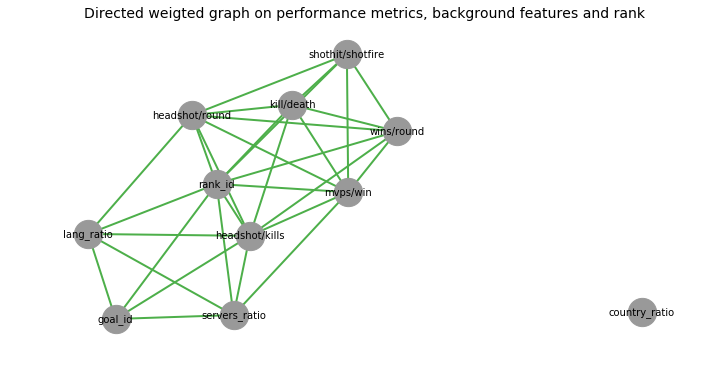

In [109]:
# Undirected Graph
plt.figure(figsize=(12,6))
plt.title("Directed weigted graph on performance metrics, background features and rank", fontsize = 14)
G=nx.Graph()
G.add_nodes_from(A)
for i in range(len(A_n)):
    p = (A_n[i],B_n[i])
    length = np.sqrt(2*(1-W_n[i]))
    weigth = W_n[i]
    G.add_edge(*p, weight = length, length = length)
        
#nx.draw(G, with_labels=True, node_color = [color[2]], node_size = 1000)
nx.draw(G, with_labels=True, node_color = [color[8]], edge_color = colors, node_size = 800, font_size=10, width=2)


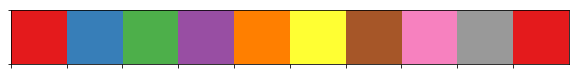

In [103]:
color = sns.color_palette("Set1", 10)
sns.palplot(color)
plt.show()

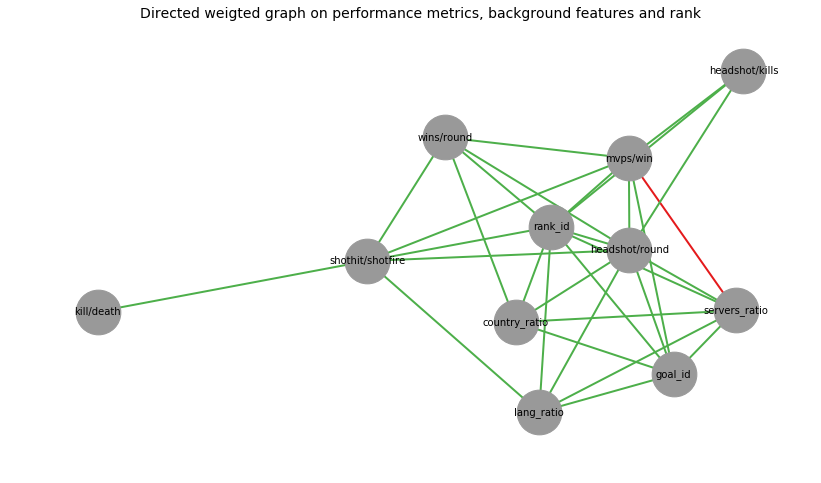

In [382]:
# Undirected Graph
plt.figure(figsize=(14,8))
plt.title("Directed weigted graph on performance metrics, background features and rank", fontsize = 14)
G=nx.Graph()
G.add_nodes_from(A)
for i in range(len(A_n)):
    p = (A_n[i],B_n[i])
    length = np.sqrt(2*(1-W_n[i]))
    weigth = W_n[i]
    G.add_edge(*p, weight = length, length = length)
        
#nx.draw(G, with_labels=True, node_color = [color[2]], node_size = 1000)
nx.draw(G, with_labels=True, node_color = [color[8]], edge_color = colors, node_size = 2000, font_size=10, width=2)


In [ ]:
'goal_id',
'servers_ratio',
'country_ratio',
'lang_ratio',
'mvps/win',
'wins/round',
'headshot/kills',
'shothit/shotfire',
'headshot/round',
'deagle',
'famas',
'fiveseven',
'galilar',
'glock',
'hkp2000',
'm4a1',
'mp7',
'p250',
'p90',
'sg556',
'ssg08',
'ump45'

'rank_id',
'kill/death',

## Clustering: Identify players with potential to reach a higher level based on their performance.

In [540]:
X_train = active_master [['user_id',
'servers_ratio',
'country_ratio',
'lang_ratio',
'mvps/win',
'wins/round',
'headshot/kills',
'shothit/shotfire',
'headshot/round',
'deagle',
'famas',
'fiveseven',
'galilar',
'glock',
'hkp2000',
'm4a1',
'mp7',
'p250',
'p90',
'sg556',
'ssg08',
'ump45',
'rank_id']]

#'goal_id',

In [520]:
list(active_master)

['user_id',
 'rank_id',
 'goal_id',
 'servers_ratio',
 'country_ratio',
 'lang_ratio',
 'ak47',
 'aug',
 'awp',
 'bizon',
 'deagle',
 'elite',
 'famas',
 'fiveseven',
 'g3sg1',
 'galilar',
 'glock',
 'hegrenade',
 'hkp2000',
 'knife',
 'm249',
 'm4a1',
 'mac10',
 'mag7',
 'molotov',
 'mp7',
 'mp9',
 'negev',
 'nova',
 'p250',
 'p90',
 'sawedoff',
 'scar20',
 'sg556',
 'ssg08',
 'taser',
 'tec9',
 'ump45',
 'xm1014',
 'kills/round',
 'deaths/round',
 'mvps/win',
 'wins/round',
 'headshot/kills',
 'shothit/shotfire',
 'kill/death',
 'time/round',
 'headshot/round',
 'shothit/round']

In [569]:
# Performing the clustering, choosing variables that has prooven to important for the rank

clustering = X_train.drop(["rank_id"], axis = 1)
# Choose the model and number of clusters
n_clusters = 9
kmeans = cluster.KMeans(n_clusters=n_clusters)
# Fit the model
kmeans.fit(clustering)
# Predict
y_kmeans = kmeans.predict(clustering)

In [570]:
cluster_data = X_train
#X_train_2 = active_profiles[["user_id", "total_kills", "total_deaths", "total_mvps", "total_wins", "total_kills_headshot", "total_rounds_played", "total_shots_fired", "goal_id"]]
cluster_data["cluster"] = y_kmeans
cluster_data = cluster_data.set_index("user_id")
cluster_data.groupby("cluster").mean()

/Users/jennyyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,servers_ratio,country_ratio,lang_ratio,mvps/win,wins/round,headshot/kills,shothit/shotfire,headshot/round,deagle,famas,...,glock,hkp2000,m4a1,mp7,p250,p90,sg556,ssg08,ump45,rank_id
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.338529,0.079630,0.289112,0.255188,0.508676,0.370022,0.185895,0.454532,0.212733,0.045444,...,0.122162,0.196131,0.194611,0.034042,0.054172,0.117272,0.020008,0.130354,0.105218,11.036402
1,0.292982,0.052122,0.309191,0.242100,0.508422,0.367899,0.188683,0.474603,0.207758,0.058155,...,0.122439,0.198820,0.198391,0.032675,0.062413,0.110410,0.020368,0.116922,0.121510,11.813405
2,0.467433,0.112597,0.345445,0.260058,0.515272,0.391444,0.185152,0.507515,0.208039,0.054939,...,0.114168,0.192863,0.194117,0.032139,0.055334,0.117525,0.016973,0.122868,0.102990,12.889289
3,0.373446,0.049051,0.317362,0.250074,0.508725,0.380342,0.189336,0.489056,0.209398,0.061312,...,0.122120,0.200100,0.198414,0.033018,0.061472,0.111890,0.019056,0.116737,0.116054,12.261652
4,0.426753,0.105695,0.325908,0.259134,0.514108,0.396041,0.184226,0.485421,0.211069,0.046866,...,0.117349,0.192718,0.192251,0.034276,0.052780,0.115135,0.018087,0.130167,0.103653,12.155294
5,0.254425,0.064345,0.265925,0.244726,0.510373,0.370879,0.185511,0.486212,0.209470,0.050130,...,0.128631,0.194685,0.192938,0.032764,0.050654,0.102580,0.017167,0.127139,0.129654,11.757360
6,0.408466,0.065591,0.282593,0.260911,0.508461,0.365520,0.184274,0.442579,0.213159,0.043103,...,0.123635,0.195362,0.193761,0.033696,0.047508,0.122104,0.022120,0.126262,0.097850,10.892822
7,0.402947,0.078206,0.314119,0.255862,0.511890,0.372412,0.183699,0.465922,0.208037,0.044858,...,0.118799,0.195010,0.192216,0.032693,0.050805,0.118089,0.022428,0.122784,0.103938,11.583265
8,0.427829,0.101225,0.322027,0.259494,0.510511,0.386624,0.184895,0.491061,0.211565,0.050691,...,0.119039,0.193990,0.193181,0.036158,0.050931,0.117344,0.017918,0.124728,0.100168,12.277083


In [548]:
cluster_data.groupby("cluster").count()

,servers_ratio,country_ratio,lang_ratio,mvps/win,wins/round,headshot/kills,shothit/shotfire,headshot/round,deagle,famas,...,glock,hkp2000,m4a1,mp7,p250,p90,sg556,ssg08,ump45,rank_id
cluster,,,,,,,,,,,,,,,,,,,,,
0,6954,6954,6954,6954,6954,6954,6954,6954,6954,6954,...,6954,6954,6954,6954,6954,6954,6954,6954,6954,6954
1,6828,6828,6828,6828,6828,6828,6828,6828,6828,6828,...,6828,6828,6828,6828,6828,6828,6828,6828,6828,6828
2,6131,6131,6131,6131,6131,6131,6131,6131,6131,6131,...,6131,6131,6131,6131,6131,6131,6131,6131,6131,6131
3,6543,6543,6543,6543,6543,6543,6543,6543,6543,6543,...,6543,6543,6543,6543,6543,6543,6543,6543,6543,6543
4,6239,6239,6239,6239,6239,6239,6239,6239,6239,6239,...,6239,6239,6239,6239,6239,6239,6239,6239,6239,6239
5,6133,6133,6133,6133,6133,6133,6133,6133,6133,6133,...,6133,6133,6133,6133,6133,6133,6133,6133,6133,6133
6,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588,...,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588
7,6099,6099,6099,6099,6099,6099,6099,6099,6099,6099,...,6099,6099,6099,6099,6099,6099,6099,6099,6099,6099
8,6218,6218,6218,6218,6218,6218,6218,6218,6218,6218,...,6218,6218,6218,6218,6218,6218,6218,6218,6218,6218


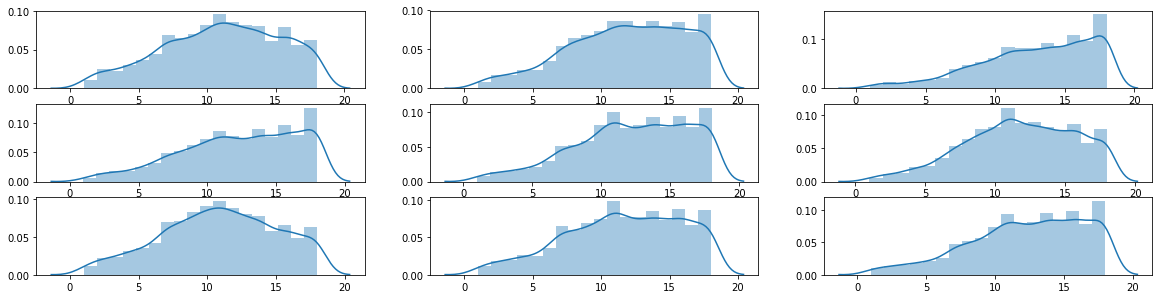

In [571]:
fig = plt.figure(figsize=(20,10))
for number in range(n_clusters):
    fig.add_subplot(6,3,number+1)
    sns.distplot(cluster_data[cluster_data["cluster"] == number]["rank_id"].values, bins = 18)

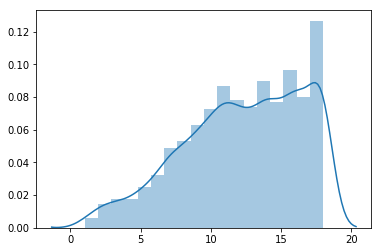

In [572]:
sns.distplot(cluster_data[cluster_data["cluster"] == 3]["rank_id"].values, bins = 18)

In [583]:
target_group = cluster_data[cluster_data["cluster"] == 3]
upcoming = target_group[target_group['rank_id']<7]
upcoming

,servers_ratio,country_ratio,lang_ratio,mvps/win,wins/round,headshot/kills,shothit/shotfire,headshot/round,deagle,famas,...,hkp2000,m4a1,mp7,p250,p90,sg556,ssg08,ump45,rank_id,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
31639,0.734524,0.065323,0.048030,0.311221,0.499472,0.304137,0.188895,0.311393,0.262513,0.253085,...,0.221551,0.168386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,3
32069,0.734524,0.065323,0.048030,0.327739,0.470295,0.387202,0.170255,0.368301,0.218651,0.000000,...,0.186467,0.175167,0.000000,0.000000,0.126946,0.000000,0.271497,0.000000,5,3
32284,0.026457,0.076546,0.398368,0.201346,0.489502,0.278980,0.156016,0.310910,0.227202,0.000000,...,0.181247,0.182581,0.194987,0.000000,0.126775,0.000000,0.000000,0.000000,3,3
31634,0.293175,0.065323,0.048030,0.165275,0.573880,0.377746,0.127221,0.568208,0.148495,0.000000,...,0.155875,0.134390,0.000000,0.000000,0.122577,0.000000,0.000000,0.111159,5,3
31645,0.293175,0.065323,0.048030,0.213766,0.455308,0.287184,0.172464,0.175171,0.207188,0.000000,...,0.159943,0.164192,0.000000,0.171178,0.000000,0.000000,0.161360,0.177753,6,3
26713,0.441349,0.007601,0.374043,0.204032,0.460845,0.287312,0.210713,0.353545,0.261617,0.239766,...,0.213544,0.223180,0.000000,0.000000,0.185001,0.000000,0.000000,0.000000,6,3
23943,0.043174,0.105974,0.073218,0.243831,0.502615,0.292739,0.200048,0.367592,0.293915,0.000000,...,0.242704,0.208333,0.000000,0.000000,0.177571,0.000000,0.000000,0.000000,5,3
23615,0.040301,0.076546,0.369746,0.240655,0.482130,0.246206,0.191955,0.371165,0.298204,0.205398,...,0.272589,0.181420,0.188906,0.000000,0.000000,0.000000,0.000000,0.000000,3,3
31571,0.043174,0.005585,0.073218,0.298265,0.461512,0.342503,0.160623,0.296284,0.218325,0.185190,...,0.187285,0.152374,0.000000,0.242567,0.145266,0.000000,0.000000,0.160378,3,3


In [544]:
cluster_0 = cluster_data[cluster_data['cluster']==0].drop(['cluster', "rank_id"],axis=1).mean().to_frame().reset_index()
cluster_1 = cluster_data[cluster_data['cluster']==1].drop(['cluster', "rank_id"],axis=1).mean().to_frame().reset_index()
cluster_2 = cluster_data[cluster_data['cluster']==2].drop(['cluster', "rank_id"],axis=1).mean().to_frame().reset_index()
cluster_3 = cluster_data[cluster_data['cluster']==3].drop(['cluster', "rank_id"],axis=1).mean().to_frame().reset_index()
cluster_4 = cluster_data[cluster_data['cluster']==4].drop(['cluster', "rank_id"],axis=1).mean().to_frame().reset_index()
cluster_5 = cluster_data[cluster_data['cluster']==5].drop(['cluster', "rank_id"],axis=1).mean().to_frame().reset_index()
cluster_6 = cluster_data[cluster_data['cluster']==6].drop(['cluster', "rank_id"],axis=1).mean().to_frame().reset_index()
cluster_7 = cluster_data[cluster_data['cluster']==7].drop(['cluster', "rank_id"],axis=1).mean().to_frame().reset_index()
#cluster_8 = cluster_data[cluster_data['cluster']==8].drop(['cluster', "rank_id"],axis=1).mean().to_frame().reset_index()
#cluster_9 = cluster_data[cluster_data['cluster']==9].drop(['cluster', "rank_id"],axis=1).mean().to_frame().reset_index()